In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import requests

In [63]:
channel_id = "1293177"  # Replace with your channel ID
url = f"https://api.thingspeak.com/channels/{channel_id}/feeds.json"

response = requests.get(url)
data = response.json()

# second way

# response = requests.get("https://api.thingspeak.com/channels/1293177/feeds.json")
# data = response.json()

In [64]:
data

{'channel': {'id': 1293177,
  'name': 'San Diego - Estación Meteorológica',
  'description': 'San Diego, Cerro Largo, Uruguay\r\nEstación Meteorológica Solar\r\n(Temp, Hum, Presion, Lluvia, Viento).\r\nESP8266, UNO R3, DTH 22, BMP 280\r\nUpdate Interval - 15 seg\r\nhttps://clima.santiago.ovh/',
  'latitude': '-31.9939484',
  'longitude': '-53.9575388',
  'field1': 'Temperatura C°',
  'field2': 'Humedad %',
  'field3': 'Pres. Atmosférica a Nivel de Estación (hPa)',
  'field4': 'Pres. Atmosférica a Nivel del Mar (hPa)',
  'field5': 'Viento',
  'field6': 'Precipitación (mm)',
  'field7': 'Dirección del Viento',
  'field8': 'UV',
  'created_at': '2021-01-30T16:32:32Z',
  'updated_at': '2023-08-24T06:51:23Z',
  'elevation': '136',
  'last_entry_id': 3603554},
 'feeds': [{'created_at': '2023-08-24T06:19:39Z',
   'entry_id': 3603455,
   'field1': '10.30',
   'field2': '80.80',
   'field3': '996.77',
   'field4': '1012.27',
   'field5': '2.66',
   'field6': '0',
   'field7': '270',
   'field8'

In [65]:
# convert data JSON to CSV
df = pd.DataFrame(data["feeds"])
df

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-08-24T06:19:39Z,3603455,10.30,80.80,996.77,1012.27,2.66,0,270,0
1,2023-08-24T06:20:00Z,3603456,10.30,80.80,996.77,1012.27,2.66,0,270,0
2,2023-08-24T06:20:16Z,3603457,10.30,80.80,996.77,1012.27,3.33,0,270,0
3,2023-08-24T06:20:34Z,3603459,10.20,80.90,996.75,1012.26,2.66,0,270,0
4,2023-08-24T06:20:56Z,3603458,10.20,80.90,996.75,1012.26,2.66,0,270,0
...,...,...,...,...,...,...,...,...,...,...
95,2023-08-24T06:48:40Z,3603550,10.30,79.30,997.13,1012.64,2.00,0,270,0
96,2023-08-24T06:48:56Z,3603551,10.30,79.30,997.13,1012.64,2.66,0,270,0
97,2023-08-24T06:49:14Z,3603552,10.30,79.30,997.13,1012.64,2.66,0,270,0
98,2023-08-24T06:49:36Z,3603553,10.30,79.10,996.88,1012.39,2.66,0,270,0


In [66]:
df.head()

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-08-24T06:19:39Z,3603455,10.30,80.80,996.77,1012.27,2.66,0,270,0
1,2023-08-24T06:20:00Z,3603456,10.30,80.80,996.77,1012.27,2.66,0,270,0
2,2023-08-24T06:20:16Z,3603457,10.30,80.80,996.77,1012.27,3.33,0,270,0
3,2023-08-24T06:20:34Z,3603459,10.20,80.90,996.75,1012.26,2.66,0,270,0
4,2023-08-24T06:20:56Z,3603458,10.20,80.90,996.75,1012.26,2.66,0,270,0


In [67]:
# "field1":"Temperatura C°","field2":"Humedad %","field3":"Pres. Atmosférica a Nivel de Estación (hPa)",
# "field4":"Pres. Atmosférica a Nivel del Mar (hPa)","field5":"Viento","field6":"Precipitación (mm)",
#             "field7":"Dirección del Viento","field8":"UV",

In [68]:
# Dict 
dict ={"field1":"Temperatura C°","field2":"Humedad %","field3":"Pres. Atmosférica a Nivel de Estación (hPa)","field4":"Pres. Atmosférica a Nivel del Mar (hPa)","field5":"Viento","field6":"Precipitación (mm)","field7":"Dirección del Viento","field8":"UV",}

In [69]:
dict

{'field1': 'Temperatura C°',
 'field2': 'Humedad %',
 'field3': 'Pres. Atmosférica a Nivel de Estación (hPa)',
 'field4': 'Pres. Atmosférica a Nivel del Mar (hPa)',
 'field5': 'Viento',
 'field6': 'Precipitación (mm)',
 'field7': 'Dirección del Viento',
 'field8': 'UV'}

In [70]:
# dict column rename
df.rename(columns=dict, inplace=True)

In [71]:
df

,created_at,entry_id,Temperatura C°,Humedad %,Pres. Atmosférica a Nivel de Estación (hPa),Pres. Atmosférica a Nivel del Mar (hPa),Viento,Precipitación (mm),Dirección del Viento,UV
0,2023-08-24T06:19:39Z,3603455,10.30,80.80,996.77,1012.27,2.66,0,270,0
1,2023-08-24T06:20:00Z,3603456,10.30,80.80,996.77,1012.27,2.66,0,270,0
2,2023-08-24T06:20:16Z,3603457,10.30,80.80,996.77,1012.27,3.33,0,270,0
3,2023-08-24T06:20:34Z,3603459,10.20,80.90,996.75,1012.26,2.66,0,270,0
4,2023-08-24T06:20:56Z,3603458,10.20,80.90,996.75,1012.26,2.66,0,270,0
...,...,...,...,...,...,...,...,...,...,...
95,2023-08-24T06:48:40Z,3603550,10.30,79.30,997.13,1012.64,2.00,0,270,0
96,2023-08-24T06:48:56Z,3603551,10.30,79.30,997.13,1012.64,2.66,0,270,0
97,2023-08-24T06:49:14Z,3603552,10.30,79.30,997.13,1012.64,2.66,0,270,0
98,2023-08-24T06:49:36Z,3603553,10.30,79.10,996.88,1012.39,2.66,0,270,0


In [72]:
df.head()

,created_at,entry_id,Temperatura C°,Humedad %,Pres. Atmosférica a Nivel de Estación (hPa),Pres. Atmosférica a Nivel del Mar (hPa),Viento,Precipitación (mm),Dirección del Viento,UV
0,2023-08-24T06:19:39Z,3603455,10.30,80.80,996.77,1012.27,2.66,0,270,0
1,2023-08-24T06:20:00Z,3603456,10.30,80.80,996.77,1012.27,2.66,0,270,0
2,2023-08-24T06:20:16Z,3603457,10.30,80.80,996.77,1012.27,3.33,0,270,0
3,2023-08-24T06:20:34Z,3603459,10.20,80.90,996.75,1012.26,2.66,0,270,0
4,2023-08-24T06:20:56Z,3603458,10.20,80.90,996.75,1012.26,2.66,0,270,0


In [73]:
df.isnull().sum()

created_at                                     0
entry_id                                       0
Temperatura C°                                 0
Humedad %                                      0
Pres. Atmosférica a Nivel de Estación (hPa)    0
Pres. Atmosférica a Nivel del Mar (hPa)        0
Viento                                         0
Precipitación (mm)                             0
Dirección del Viento                           0
UV                                             0
dtype: int64

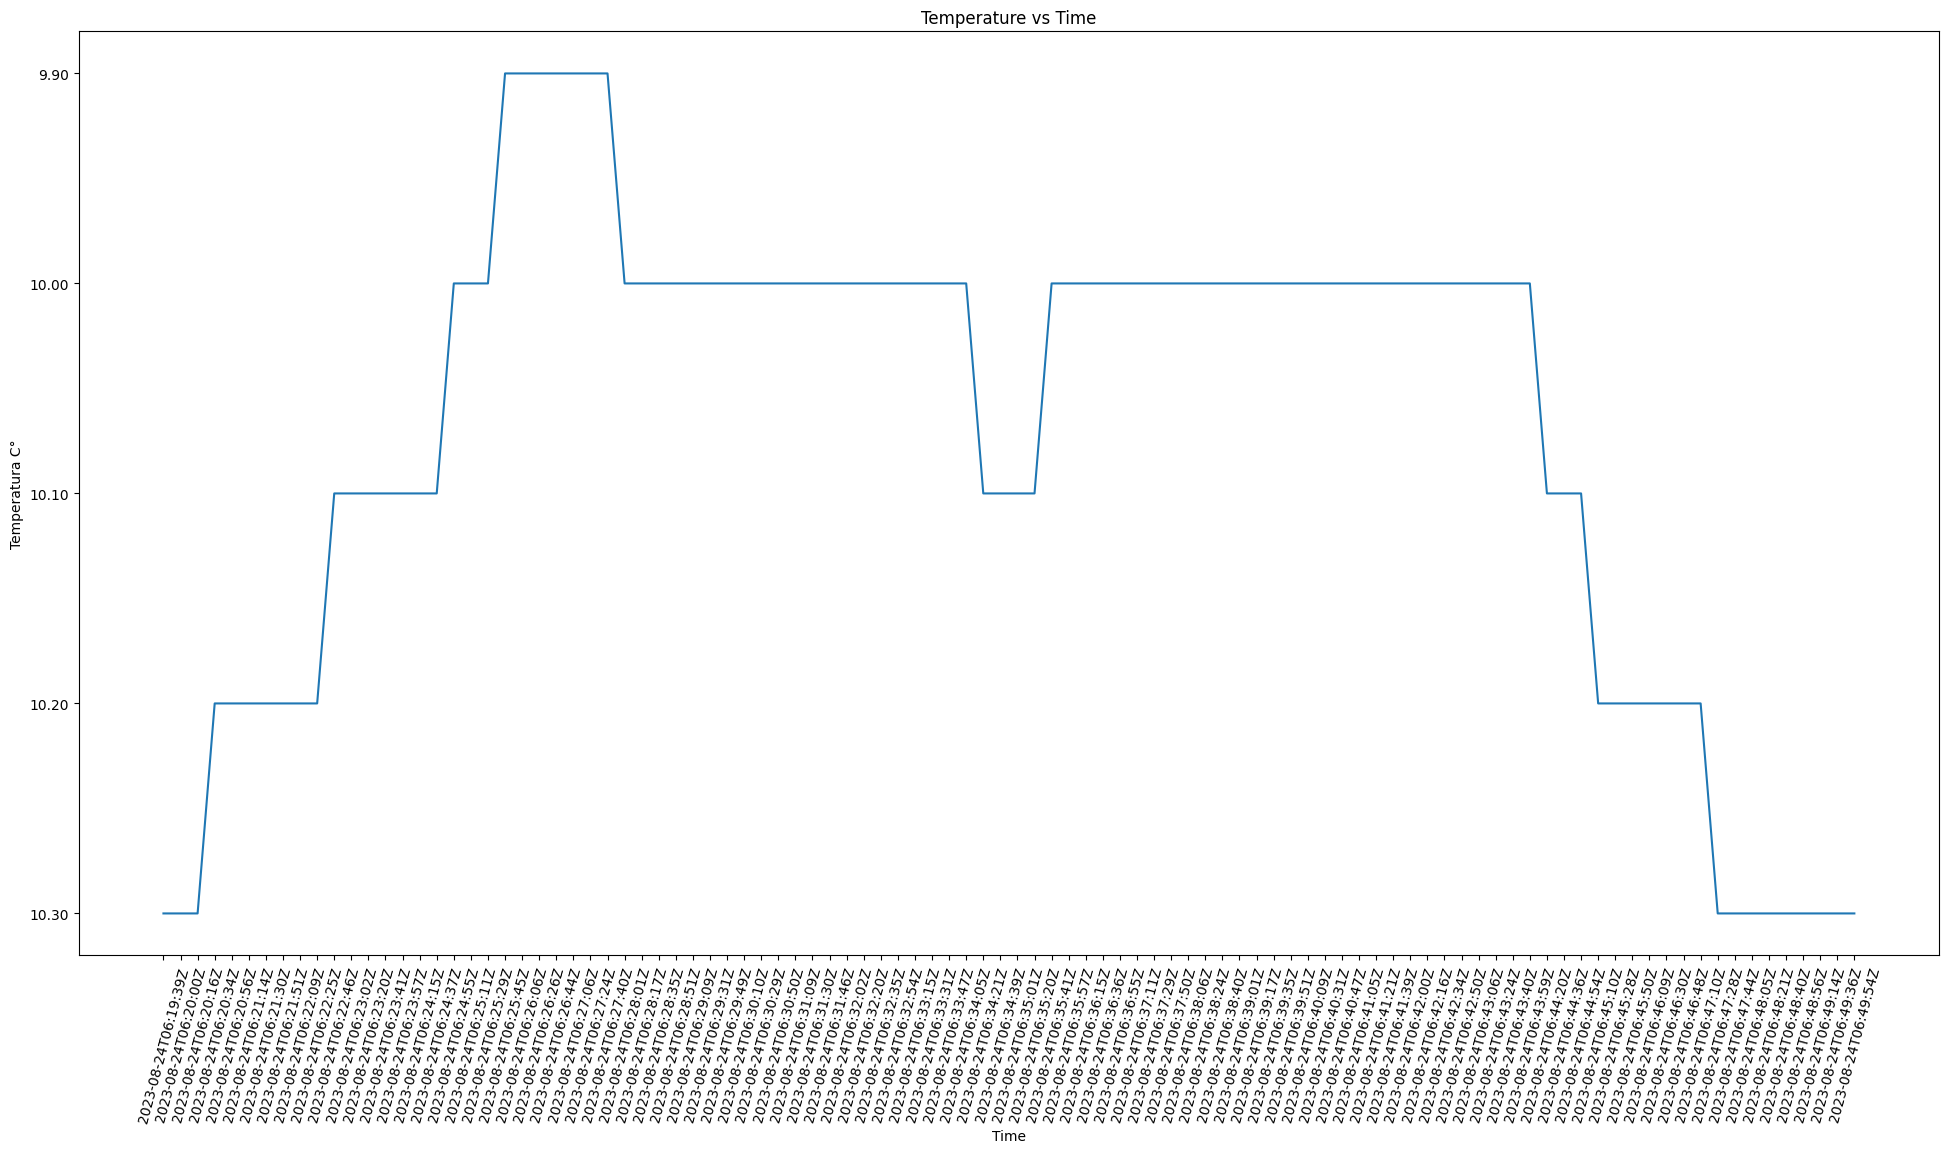

In [78]:
# Plot
plt.figure(figsize=(24,12))
plt.title("Temperature vs Time")
plt.xlabel("Time")
plt.ylabel("Temperatura C°")
plt.xticks(rotation=75)
plt.plot(df["created_at"],df["Temperatura C°"])
plt.show()

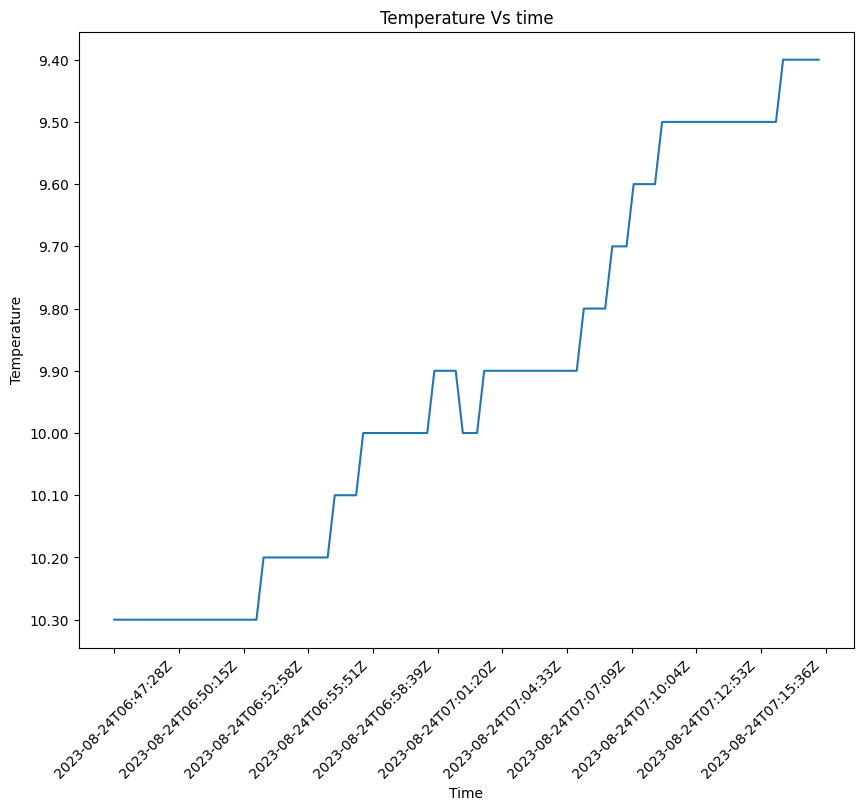

In [95]:
chennel_id = 1293177
res=requests.get(f"https://thingspeak.santiago.ovh/channels/{chennel_id}/feed.json")
data=res.json()
df = pd.DataFrame(data["feeds"])
dict={"field1":"Temperatura C°","field2":"Humedad %","field3":"Pres. Atmosférica a Nivel de Estación (hPa)","field4":"Pres. Atmosférica a Nivel del Mar (hPa)","field5":"Viento","field6":"Precipitación (mm)","field7":"Dirección del Viento","field8":"UV"}
df.rename(columns=dict,inplace= True)
# df
plt.figure(figsize=(10,8))
plt.plot(df["created_at"],df["Temperatura C°"])
# plt.annotate()
plt.xticks(np.linspace(0, 100, 12),rotation=45)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature Vs time")
plt.show()